<a href="https://colab.research.google.com/github/thual/POM-ch4-cordeTendue/blob/main/cordeTendue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscillations d'une corde tendue

**Activité :** *Changez les paramètres des simulations*

**Contexte :**

Les oscillations d'une corde tendues sont modélisées par l'équation de d'Alembert:
$${\partial^2 y \over \partial t^2} (x,t) = c^2 \, {\partial^2 y\over \partial x^2} (x,t)\,$$
où $y(x,t)$ est déplacement transversal de la corde. On suppose que $L$ est la longueur de la corde et l'on se place donc dans l'intervalle $x\in [0,L]$. 

Les oscillations propres ainsi que la réponse de la corde à une excitation périodique (corde de Melde) sont étudiées ici. 

## Exemple d'oscillation 
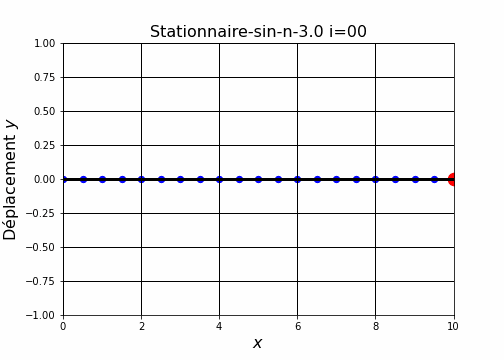

**Oscillations propres :**

Les modes propres d'oscillation de la corde contenue dans l'intervalle $[0,L]$ sont décrites par les ondes stationnaires suivantes.

* Onde stationnaire $y(x,t) = A \cos(k_n x) \cos(\omega_n t)$ avec $k_n = n \pi /L$ et $n$ entier ou demi-entier
* Onde stationnaire $y(x,t) = A \sin(k_n x) \cos(\omega_n t)$ avec $k_n = n \pi /L$ et $n$ entier ou demi-entier
Les configurations suivantes sont considéreés. 

Suivant le choix de $n$ et d'un de ces types ondes, on obtient les oscillations propres correspondant au conditions aux limites suivantes : 
* Une ou deux extrémités fixes : $y(0,t)=0$ ou $y(L,t)=0$. 
* Une ou deux extrémités libre  : ${\partial y\over \partial x} (0,t)=0$ ou ${\partial y\over \partial x} (L,t)=0$. 

 

## Oscillations propres en sinus pour $n$ croissant
# 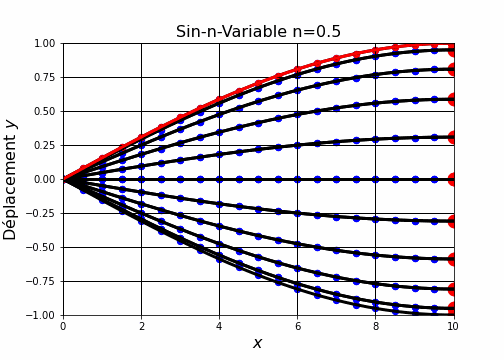

**Corde de Melde  :**

On considère ici les conditions aux limites :
$$ y(0,t) =0 \quad\hbox{et} \quad y(L,t) = a\, \sin(\omega_e\, t)\;,$$
où $a$ est l'amplitude du forçage et $\omega_e$ sa pulsation. On note $y_{max}$ l'amplitude maximale de l'oscillation de la corde après dissipation des transitoires issus des conditions initiales $y(x,0)=y_0(x)$ et ${\partial y\over \partial t}(x,0)=v_0(x)$. 

On note $X=\omega_e/\omega_1$ où $\omega_1 = \pi \, c/L$ est la fréquence du mode fondamental de vibration de la corde lorsque ses deux extrémités sont fixes. On note $Y=y_{max}/a$ où $y_{max}$  l'amplitude maximale de la réponse de la corde. 
 

## Corde de Melde pour $X$ croissant
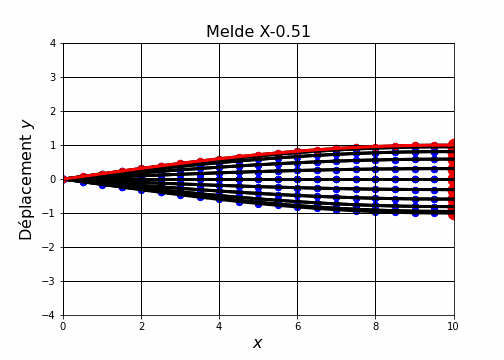

# Première partie du programme

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme ! 
*   Colab : ⌘/Ctrl+F9 pour tout exécuter.
*   MyBinder : -> Run -> "Run all cells"




In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

print("Corde tendue")
# Petits outils
# ================================================

def zfi(x,le=2):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

def ReponseMelde():
    # Fonction reponse Corde de Melde
    chimax=5; dchi=.01
    chi=np.linspace(dchi,chimax-dchi,200)
    Y=np.abs(1/np.sin(np.pi*chi))
    plt.figure(1,figsize=(7,4))
    plt.xlabel(r'$X=\omega/\omega_1$',fontsize=16 )
    plt.ylabel(r'$|Y|=|A|/A_e$',fontsize=16)
    plt.title("Amplitude de la corde de Melde",fontsize=16)
    plt.plot(chi,Y,color='black',linewidth=3)
    plt.xlim(0,chimax)
    plt.ylim(0,4)
    plt.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    plt.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    plt.savefig("Melde")
    plt.show()
    plt.close()


# Animations d'ondes
# ================================================

def AniSinSimp(): 
    # Sinus n entier simple
    global Time, name
    global signal,ymin,ymax    
    global inter, fram
    Time=2*L/c;
    k=np.pi/L; omega=k*c;
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=np.sin(n*k*a)*np.cos(omega*t+np.pi/2)
        return xi
    for m in range(0,Nn):
        n=round(nmin+m*dn,2)
        name="Stationnaire-sin-n-"+zfi(n)
        print(name)
        fram=np.arange(0,Nt)
        ani=Gifanim(anisimple)      
    return ani

def AniCosSimp(): 
    # Cos n entier simple
    global Time, name
    global signal,ymin,ymax    
    global inter, fram
    Time=2*L/c;
    k=np.pi/L; omega=k*c;
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=np.cos(n*k*a)*np.cos(omega*t+np.pi/2)
        return xi
    for m in range(0,Nn):
        n=round(nmin+m*dn,2)
        name="Stationnaire-cos-n-"+zfi(n)
        print(name)
        fram=np.arange(0,Nt)
        ani=Gifanim(anisimple)      
    return ani

def AniSinPersi(): 
    # Sinus n entier persistant
    global Time, name
    global signaln, ymin, ymax 
    global inter, fram
    Time=2*L/c;
    k=np.pi/L; omega=k*c;
    name="Sin-n-Variable"
    # signal 
    def signaln(a,t,n):
        xi=np.sin(n*k*a)*np.cos(omega*t+np.pi/2)
        return xi
    fram=np.arange(0,Nn)
    ani=Gifanim(anipersi)
    return ani

def AniCosPersi(): 
    # Cos n entier persistant
    global Time, name
    global signaln, ymin, ymax 
    global inter, fram
    Time=2*L/c;
    k=np.pi/L; omega=k*c;
    name="Cos-n-Variable"
    # signal 
    def signaln(a,t,n):
        xi=np.cos(n*k*a)*np.cos(omega*t+np.pi/2)
        return xi
    fram=np.arange(0,Nn)
    ani=Gifanim(anipersi)
    return ani

def AniMeldeSimp():
    # Melde simple
    global Time, name
    global signal,ymin,ymax    
    global inter, fram
    for m in range(0,NX,1):
        X=round(Xmin+m*dX,2)
        print("m=",m,"X=",X)
        k=X*np.pi/L; omega=k*c; Time=2*np.pi/omega
        Y=np.abs(1/np.sin(np.pi*X))
        ymin=-4; ymax=4;
        inter=200
        # signal 
        def signal(a,t):
            xi=Y*np.sin(k*a)*np.cos(omega*t+np.pi/2)
            return xi
        name="Melde-X-"+zfi(X)
        print(name)
        fram=np.arange(0,Nt)
        ani=Gifanim(anisimple)
    return ani

def AniMeldeRema():
    # Melde remanant
    global Time, name
    global signal, ymin, ymax 
    global inter, fram 
    name="MeldeXvariable"
    inter=500
    fram=np.arange(0,NX)
    ani=Gifanim(anirema)
    return ani


# Fonction d'animations appelées par FuncAnimation
# ================================================

def anisimple(i):
    # Animation simple
    global Time, name
    global signal, ymin, ymax 
    a=np.linspace(0,L,N+1);
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    # signal
    t=dt*i;
    xicont=signal(acont,t)
    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'Déplacement $y$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # Tracé du signal
    xi=signal(a,t)
    afin=a[N]; xifin=xi[N]
    ax.scatter(a,xi,marker='o',color='blue',s=40)
    if Redpoint: ax.scatter(afin,xifin,marker='o',color='red',s=160)
    ax.plot(acont,xicont,color='black',linewidth=3)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        fig.savefig(namei)
        
def anipersi(m):
    # Animation persistante sur n
    global Time, name
    global signaln, ymin, ymax
    a=np.linspace(0,L,N+1);
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    n=round(nmin+m*dn,2)
    ymin=-1; ymax=1;
    # Figure 
    ax.clear()
    title=name+" n="+zfi(n)
    #print(title)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'Déplacement $y$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # Tracé du signal
    for i in range(0,Nt+1):
        t=dt*i;
        xi=signaln(a,t,n)
        xicont=signaln(acont,t,n)
        afin=a[N]; xifin=xi[N]
        ax.scatter(a,xi,marker='o',color='blue',s=40)
        if Redpoint: ax.scatter(afin,xifin,marker='o',color='red',s=160)
        ax.plot(acont,xicont,color='black',linewidth=3)
        ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
        ax.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    t=3*Time/4
    xi=signaln(a,t,n)
    xicont=signaln(acont,t,n)
    ax.scatter(a,xi,marker='o',color='red',s=40)
    ax.plot(acont,xicont,color='red',linewidth=3)
    # Sauver toutes les figures
    if FlagSavext: 
        namen=name+zfi(n)+ext;
        fig.savefig(namen)


def anirema(m):
    # Animation rémanante sur X
    global Time, name
    global signal, ymin, ymax #animation
    a=np.linspace(0,L,N+1);
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    X=round(Xmin+m*dX,2)
    k=X*np.pi/L; omega=k*c; Time=2*np.pi/omega
    Y=np.abs(1/np.sin(np.pi*X))
    ymin=-4; ymax=4;
    name="Melde X-"+zfi(X)
    # print(name)
    # signal 
    def signal(a,t):
        xi=Y*np.sin(k*a)*np.cos(omega*t+np.pi/2)
        return xi
    # Figure 
    ax.clear()
    title=name
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'Déplacement $y$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # Tracé du signal
    for i in range(0,Nt+1):
        t=dt*i;
        xi=signal(a,t)
        xicont=signal(acont,t)
        afin=a[N]; xifin=xi[N]
        ax.scatter(a,xi,marker='o',color='blue',s=40)
        if Redpoint: ax.scatter(afin,xifin,marker='o',color='red',s=160)
        ax.plot(acont,xicont,color='black',linewidth=3)
        ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
        ax.grid(color='black', axis='x', linestyle='-', linewidth=1)        
    t=3*Time/4
    xi=signal(a,t)
    xicont=signal(acont,t)
    ax.scatter(a,xi,marker='o',color='red',s=40)
    ax.plot(acont,xicont,color='red',linewidth=3)
    # Sauver toutes les figures
    if FlagSavext: 
        namem=name+zfi(m)+ext;
        fig.savefig(namem)


# Fonction Gifanim
# ================

def Gifanim(anifunc):
    global inter, fram
    ani=FuncAnimation(fig,anifunc,frames=fram,interval=inter,repeat=True)
    namegif=name+".gif"
    print(" ")   
    print("==================================")
    print("Simulation pour créer un gif animé")  
    ani.save(namegif,writer="pillow")
    print("   Gif animé créé :",namegif)
    # Visualisation animée de la simulation 
    print("Simulation pour visualiser l'animation")   
    plt.close() 
    plt.rc('animation', html='jshtml')
    return ani

Corde tendue


# Paramètres du programme

*(Colab : Cliquez sur le triangle à gauche de titre pour visualiser le code et changer les paramètres !)*


** Paramètres principaux :**

NB : les lignes de commande séparées à la suite du progamme permettent de modifier des valeurs de $n$ ou de $X$

** Paramètres principaux :**

*   `Nn` :  Nombre de valeurs pour n variable (5)
*   `dn` et `nmin` : Exploration de $n=nmin+m dn$ pour $m=1,...,Nn$ 
*   `NX=` : ombre de valeurs pour X variable (20)
*   `dX` et `Xmin` : Exploration de $X=Xmin+m dX$ pour $m=1,...,Nx$
*   `Nt` : Nombre d'images par les animations temporelles (20)
*   `FlagSavext` : Sauver les  des fichiers
*   `ext`: Extension des fichiers à sauver (.png, .pdf, .jpg, etc.)

**Tracé de la réponse de la corde Melde :**

*   `FlagReponseMelde` : Réponses $Y=y_{max}/a$ en fonction de $X=\omega_e/\omega_1$

**Types d'ondes :**

NB : les types non activés sont lancés dans des lignes de commandes séparées, à la fin du programme.

*   `FlagAniSinSimp` : Animation oscillations en sinus
*   `FlagAniSinPersi` : Oscillations en sinus avec persitance
*   `FlagAniCosSimp` : Animation oscillations en cosinus
*   `FlagAniCosPersi` : Oscillations en cosinus avec persitance
*   `FlagAniMeldeSimp` : Animation de la corde de Melde
*   `FlagAniMeldeRema` : Oscillation de la cordre de Melde avec persistance

*Exécutez le code ci-dessous (Colab : cliquez sur "1 cellule masquée" pour changer les paramètres) !*

In [ ]:
F=False; T=True

# Figures statiques
FlagReponseMelde=T
    
# Animations (affichage en ligne de la dernière uniquement)
FlagAniSinSimp=T
FlagAniSinPersi=F
FlagAniCosSimp=F
FlagAniCosPersi=F
FlagAniMeldeSimp=F
FlagAniMeldeRema=F

# Paramètres pouvant être changézs
Nt=20 # Nombre d'images pour l'animation
Nn=5 # Nombre de valeurs pour n variable
NX=20 # Nombre de valeurs pour X variable
ext=".png"
FlagSavext=F # Création de fichier ext pour chaque image
dX=.2; Xmin=0.51; # Exploration de N valeurs de X pour Meld
dn=1; nmin=1; # Exploration de N valeurs de n pour Cos ou Sin


# Paramètres qu'il n'est pas utile de changer
Na=501; # Nombre de points pour le tracé
N=20 # Nombre de ponts noirs sur la corde
L=10; # Longueur de l'intervalle
c=1; # Vitesse des ondes
inter=300; # millisecondes animation par défaut
Redpoint=T; # Tracé d'un point rouge en L pour la corde de Melde

# Paramètres dérivés
Time=2*L/c;  

# Figures statique
if FlagReponseMelde==F: ReponseMelde()

# Animations
global name
# Figure preparation 
fig=plt.figure(1,figsize=(7,5))
ax=plt.subplot(1,1,1)
# Choix de l'animation
if FlagAniSinSimp==T: ani=AniSinSimp()
if FlagAniSinPersi==T: ani=AniSinPersi()
if FlagAniCosSimp==T: ani=AniCosSimp()
if FlagAniCosPersi==T: ani=AniCosPersi()
if FlagAniMeldeSimp==T: ani=AniMeldeSimp()
if FlagAniMeldeRema==T: ani=AniMeldeRema()  

# Animation 
# Cette commande doit rester la dernière pour être suivie d'effet
ani


Stationnaire-sin-n-01
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-sin-n-01.gif
Simulation pour visualiser l'animation
Stationnaire-sin-n-02
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-sin-n-02.gif
Simulation pour visualiser l'animation
Stationnaire-sin-n-03
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-sin-n-03.gif
Simulation pour visualiser l'animation
Stationnaire-sin-n-04
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-sin-n-04.gif
Simulation pour visualiser l'animation
Stationnaire-sin-n-05
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-sin-n-05.gif
Simulation pour visualiser l'animation


# Autres animations



In [ ]:
Nn=3; dn=.5; nmin=.5; AniCosSimp()

Stationnaire-cos-n-0.5
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-cos-n-0.5.gif
Simulation pour visualiser l'animation
Stationnaire-cos-n-1.0
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-cos-n-1.0.gif
Simulation pour visualiser l'animation
Stationnaire-cos-n-1.5
 
Simulation pour créer un gif animé
   Gif animé créé : Stationnaire-cos-n-1.5.gif
Simulation pour visualiser l'animation


In [ ]:
Nn=20; dn=.5; nmin=.5; AniSinPersi()

 
Simulation pour créer un gif animé
   Gif animé créé : Sin-n-Variable.gif
Simulation pour visualiser l'animation


In [ ]:
NX=3; dX=.2; Xmin=0.51; AniMeldeSimp()

m= 0 X= 0.51
Melde-X-0.51
 
Simulation pour créer un gif animé
   Gif animé créé : Melde-X-0.51.gif
Simulation pour visualiser l'animation
m= 1 X= 0.71
Melde-X-0.71
 
Simulation pour créer un gif animé
   Gif animé créé : Melde-X-0.71.gif
Simulation pour visualiser l'animation
m= 2 X= 0.91
Melde-X-0.91
 
Simulation pour créer un gif animé
   Gif animé créé : Melde-X-0.91.gif
Simulation pour visualiser l'animation


In [ ]:
NX=20; dX=.2; Xmin=0.51; AniMeldeRema()  

 
Simulation pour créer un gif animé
   Gif animé créé : MeldeXvariable.gif
Simulation pour visualiser l'animation
